# Capstone

**Overview**: The dataset for this project has come from https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Default%20of%20Credit%20Card%20Clients. It is a classification problem for default credit card customers.  



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
import pandas as pd
import numpy as np

In [3]:
sns.set_theme()

In [4]:
df = pd.read_csv('data/default of credit card clients.csv', sep = ',', header=1)

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 25)

# Understanding Features:

| Column   Position 	| Atrribute Name                	| Definition                                                                                                                            	| Data Type    	| Example              	| % Null Ratios 	|
|:-----------------:|:------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------|:------------:|:--------------------:|:-------------:|
| 1                 	| X1: LIMIT_BAL                 	| Amount of the   given credit (NT dollar): it includes both the individual consumer credit and   his/her family (supplementary) credit 	| Quantitative 	| 50000, 320000, 40000 	| 0             	|
| 2                 	| X2: SEX                       	| Gender (1 =   male; 2 = female)                                                                                                       	| Quantitative 	| 1, 2                 	| 0             	|
| 3                 	| X3: EDUCATION                 	| Education (1 =   graduate school; 2 = university; 3 = high school; 4 = others)                                                        	| Quantitative 	| 1, 2, 3              	| 0             	|
| 4                 	| X4: MARRIAGE                  	| Marital status   (1 = married; 2 = single; 3 = others)                                                                                	| Quantitative 	| 1, 2, 3              	| 0             	|
| 5                 	| X5: AGE                       	| Age (year)                                                                                                                            	| Quantitative 	| 37, 29, 43           	| 0             	|
| 6                 	| X6: PAY_0                     	| History of   past payment. The repayment status in September, 2005*                                                                   	| Quantitative 	| 0, 1, -1             	| 0             	|
| 7                 	| X7: PAY_2                     	| History of past payment. The repayment status in August, 2005*                                                                        	| Quantitative 	| 0, 2, -2             	| 0             	|
| 8                 	| X8: PAY_3                     	| History of past payment. The repayment status in July, 2005*                                                                          	| Quantitative 	| 0, -2, -1            	| 0             	|
| 9                 	| X9: PAY_4                     	| History of past payment. The repayment status in June, 2005*                                                                          	| Quantitative 	| 0, 2, 1              	| 0             	|
| 10                	| X10: PAY_5                    	| History of past payment. The repayment status in May, 2005*                                                                           	| Quantitative 	| 1, -2, 1             	| 0             	|
| 11                	| X11: PAY_6                    	| History of past payment. The repayment status in April, 2005*                                                                         	| Quantitative 	| 0, 1, -1             	| 0             	|
| 12                	| X12: BILL_AMT1                	| Amount of bill   statement in September, 2005 (NT dollar)                                                                             	| Quantitative 	| 46990, 58267, 38257  	| 0             	|
| 13                	| X13: BILL_AMT2                	| Amount of bill   statement in August, 2005 (NT dollar)                                                                                	| Quantitative 	| 48233, 59246, 38901  	| 0             	|
| 14                	| X14: BILL_AMT3                	| Amount of bill   statement in July, 2005 (NT dollar)                                                                                  	| Quantitative 	| 49291, 60184, 38103  	| 0             	|
| 15                	| X15: BILL_AMT4                	| Amount of bill   statement in June, 2005 (NT dollar)                                                                                  	| Quantitative 	| 28314, 58622, 36207  	| 0             	|
| 16                	| X16: BILL_AMT5                	| Amount of bill   statement in May, 2005 (NT dollar)                                                                                   	| Quantitative 	| 28959, 62307, 33138  	| 0             	|
| 17                	| X17: BILL_AMT6                	| Amount of bill   statement in April, 2005 (NT dollar)                                                                                 	| Quantitative 	| 29547, 63526, 31339  	| 0             	|
| 18                	| X18: PAY_AMT1                 	| Amount of   previous payment. Paid in September, 2005 (NT dollar)                                                                     	| Quantitative 	| 2000, 2500, 1700     	| 0             	|
| 19                	| X19: PAY_AMT2                 	| Amount of   previous payment. Paid in August, 2005 (NT dollar)                                                                        	| Quantitative 	| 2019, 2500, 1504     	| 0             	|
| 20                	| X20: PAY_AMT3                 	| Amount of   previous payment. Paid in July, 2005 (NT dollar)                                                                          	| Quantitative 	| 1200, 0, 1200        	| 0             	|
| 21                	| X21: PAY_AMT4                 	| Amount of   previous payment. Paid in June, 2005 (NT dollar)                                                                          	| Quantitative 	| 1100, 4800, 1500     	| 0             	|
| 22                	| X22: PAY_AMT5                 	| Amount of   previous payment. Paid in May, 2005 (NT dollar)                                                                           	| Quantitative 	| 1069, 2400, 1500     	| 0             	|
| 23                	| X23: PAY_AMT6                 	| Amount of   previous payment. Paid in April, 2005 (NT dollar)                                                                         	| Quantitative 	| 1000, 1600, 1000     	| 0             	|
| 24                	| Y: Default Payment Next Month 	| Probability of Default. (1: Yes, 0: No)                                                                                               	| Quantitative 	| 1, 0                 	| 0             	|---

*The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

### Acknowledgement

This data set has been sourced from the Machine Learning Repository of University of California, Irvine [Default of Credit Card Clients Data Set (UC Irvine)](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). 
The UCI page mentions the following publication as the original source of the data set:

*Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480*


# Exploratory Data Analysis

## Check Missing Values

In [7]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Check for Duplicates

In [8]:
df.duplicated().sum()

0

## Cleaning the Data


In [9]:
print(df['MARRIAGE'].min(), df['MARRIAGE'].max()) 
# we need to add 0s to 3s since marriage column does not suppose to have zeros

0 3


In [10]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3});
df['MARRIAGE'] = df['MARRIAGE'].replace({1: 'Married', 2: 'Single', 3: 'Other'});

In [11]:
print(df['EDUCATION'].min(), df['EDUCATION'].max()) 
# same goes for education, we don't have 0 or 5 or 6, we add them as 4 as for "other"

0 6


In [12]:
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5:4, 6:4});
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Graduate School',2: 'University', 3: 'High School', 4: 'Others'});

In [13]:
print(df['SEX'].min(), df['SEX'].max()) # gender is the correct range, we have 1 and 2
df['SEX'] = df['SEX'].replace({1: 'Male', 2:'Female'});

1 2


In [14]:
print(df['default payment next month'].min(), df['default payment next month'].max()) 
# the predict variable is correct range. 

0 1


In [15]:
print(df['LIMIT_BAL'].min(), df['LIMIT_BAL'].max()) 
# balance is in the right range, but right skewed

10000 1000000


In [16]:
print(df['AGE'].min(), df['AGE'].max()) 
# Age is right skewed

21 79


In [17]:
print(df['PAY_0'].min(), df['PAY_0'].max()) 

-2 8


In [18]:
print(df['BILL_AMT6'].min(), df['BILL_AMT6'].max()) 


-339603 961664


In [19]:
print(df['PAY_AMT3'].min(), df['PAY_AMT3'].max()) 


0 896040


In [20]:
df[df['BILL_AMT6']<0][['default payment next month']].count()

default payment next month    688
dtype: int64

In [21]:
df = df[df['BILL_AMT1']>0]
df = df[df['BILL_AMT2']>0]
df = df[df['BILL_AMT3']>0]
df = df[df['BILL_AMT4']>0]
df = df[df['BILL_AMT5']>0]
df = df[df['BILL_AMT6']>0]

## Check for Imblanace Data

default payment next month
0    0.773678
1    0.226322
Name: proportion, dtype: float64

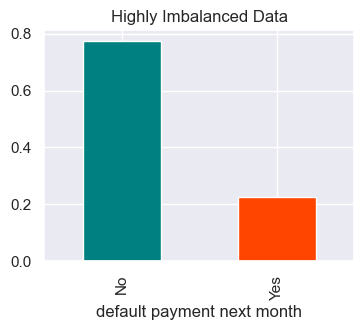

In [22]:
df['default payment next month'].replace({0:'No', 1:'Yes'}).value_counts(normalize=True).plot(kind='bar', title='Highly Imbalanced Data', 
                                                                   color=["teal","orangered"], figsize=(4,3));
df['default payment next month'].value_counts(normalize=True) 
#dummy classifier is good 77.37% only, we had to beat 77.37% for any algorithm we use

### Check Balance Distribution

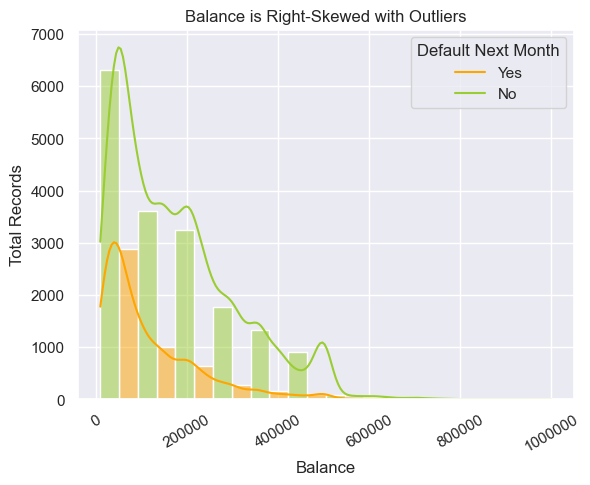

In [23]:
ax = sns.histplot(data=df, x='LIMIT_BAL', hue='default payment next month', kde=True, multiple='dodge', bins=12, palette=['yellowgreen', 'orange'])
ax.set( title='Balance is Right-Skewed with Outliers')
sns.move_legend(ax, "upper right", bbox_to_anchor=(1, 1))
plt.legend(title='Default Next Month', labels=['Yes','No'])
plt.xlabel('Balance')
plt.ylabel("Total Records")
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 30);

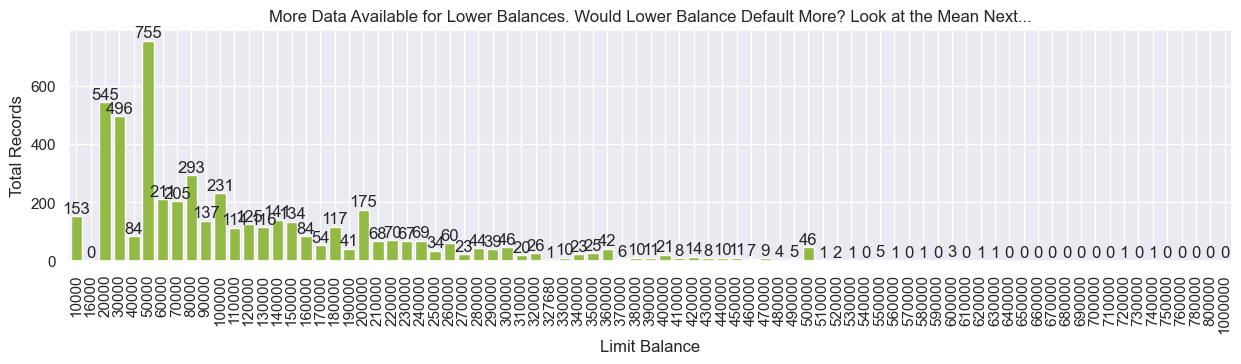

In [24]:
df_bal = df.groupby(['LIMIT_BAL'])[['default payment next month']].sum() 
df_bal=df_bal.rename(columns = {'default payment next month':'Would Default'})

fig, ax = plt.subplots(figsize=(15,3))

ax = sns.barplot(df_bal.reset_index(), x='LIMIT_BAL',  y='Would Default', color="yellowgreen")
ax.bar_label(ax.containers[0])
ax.set( title='More Data Available for Lower Balances. Would Lower Balance Default More? Look at the Mean Next...')
ax.grid(visible=True, axis='both')
plt.xlabel('Limit Balance')
plt.ylabel("Total Records");
plt.xticks(rotation = 90);

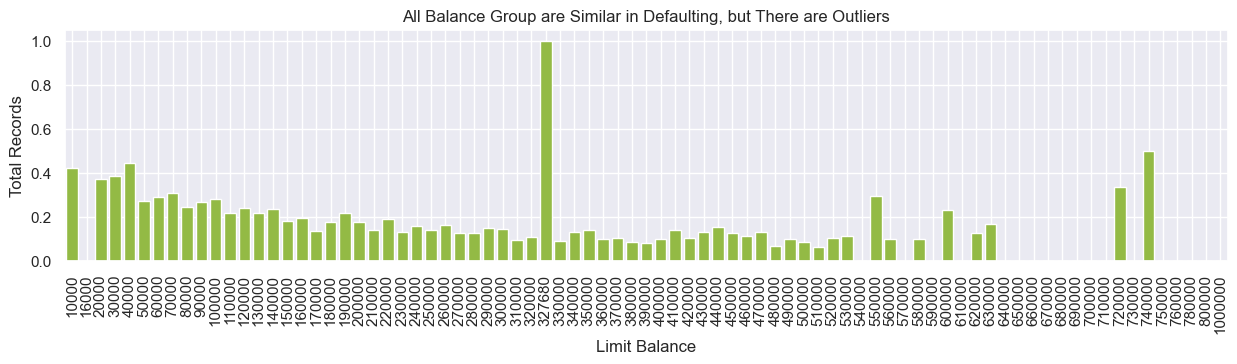

In [25]:
df_bal = df.groupby(['LIMIT_BAL'])[['default payment next month']].mean() 
df_bal=df_bal.rename(columns = {'default payment next month':'Would Default'})

fig, ax = plt.subplots(figsize=(15,3))

ax = sns.barplot(df_bal.reset_index(), x='LIMIT_BAL',  y='Would Default', color="yellowgreen")
ax.set( title='All Balance Group are Similar in Defaulting, but There are Outliers')
ax.grid(visible=True, axis='both')
plt.xlabel('Limit Balance')
plt.ylabel("Total Records");
plt.xticks(rotation = 90);

In [26]:
# one outliner in the middle of the chart!

### Check Age Distribution

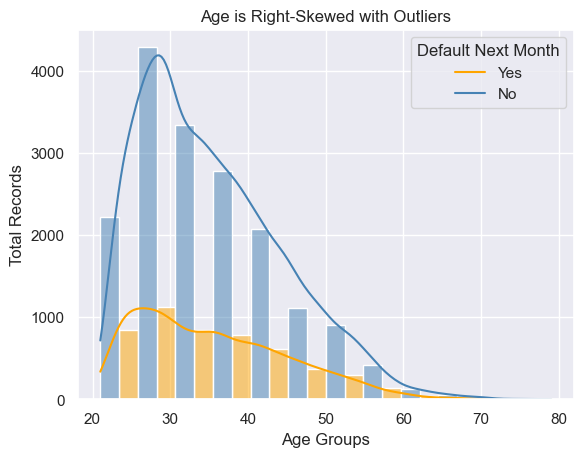

In [27]:
ax = sns.histplot(data=df, x='AGE', hue='default payment next month', kde=True, multiple='dodge', bins=12, palette=['steelblue', 'orange'])
ax.set( title='Age is Right-Skewed with Outliers')
ax.grid(visible=True, axis='both')
sns.move_legend(ax, "upper right", bbox_to_anchor=(1, 1))
plt.legend(title='Default Next Month', labels=['Yes','No'])
plt.xlabel('Age Groups')
plt.ylabel("Total Records");

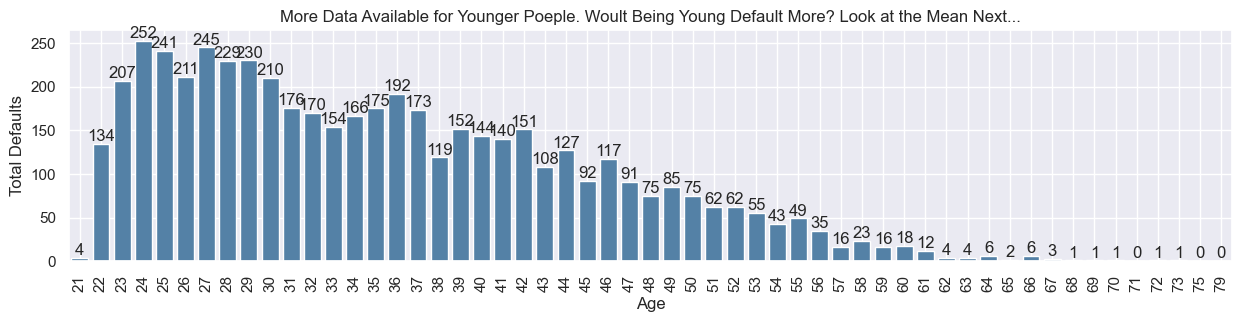

In [28]:
df_age = df.groupby(['AGE'])[['default payment next month']].sum() 
df_age=df_age.rename(columns = {'default payment next month':'Would Default'})

fig, ax = plt.subplots(figsize=(15,3))

ax = sns.barplot(df_age.reset_index(), x='AGE',  y='Would Default', color="steelblue")
ax.bar_label(ax.containers[0])
ax.set( title='More Data Available for Younger Poeple. Woult Being Young Default More? Look at the Mean Next...')
ax.grid(visible=True, axis='both')
plt.xlabel('Age')
plt.ylabel("Total Defaults");
plt.xticks(rotation = 90);

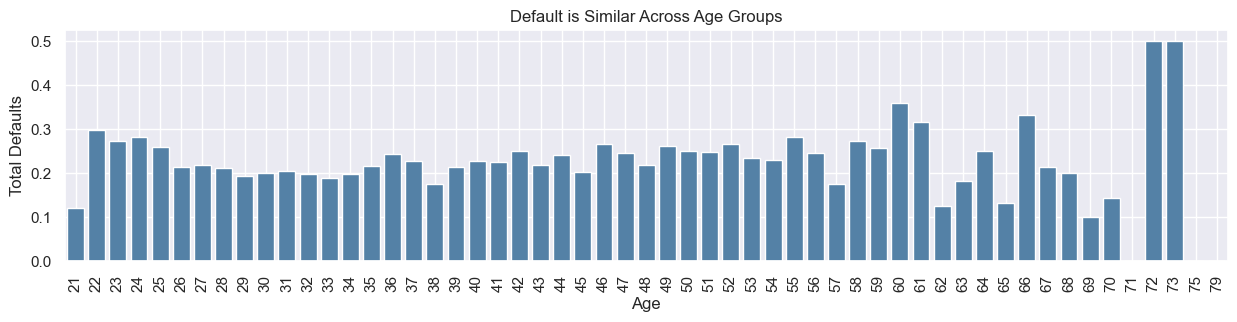

In [29]:
df_age = df.groupby(['AGE'])[['default payment next month']].mean() 
df_age=df_age.rename(columns = {'default payment next month':'Would Default'})

fig, ax = plt.subplots(figsize=(15,3))

ax = sns.barplot(df_age.reset_index(), x='AGE',  y='Would Default', color="steelblue")
ax.set( title='Default is Similar Across Age Groups')
ax.grid(visible=True, axis='both')
plt.xlabel('Age')
plt.ylabel("Total Defaults");
plt.xticks(rotation = 90);

### Check Gender Distribution

<Axes: title={'center': 'More Women than Men in the Data'}, xlabel='SEX'>

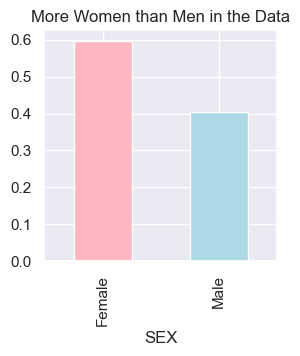

In [30]:
df['SEX'].value_counts(normalize=True).plot(kind='bar', title='More Women than Men in the Data', figsize=(3,3),
                                                                   color=["lightpink", "lightblue"])


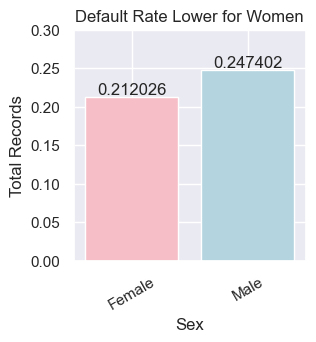

In [31]:
df_sex = df.groupby(['SEX'])[['default payment next month']].mean() 
df_sex=df_sex.rename(columns = {'default payment next month':'Would Default'})

fig, ax = plt.subplots(figsize=(3,3))

ax = sns.barplot(df_sex.reset_index(), x='SEX',  y='Would Default', palette=["lightpink", "lightblue"], hue=['Female','Male'])
ax.set(ylim=(0, 0.30))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.grid(visible=True, axis='both')
ax.set( title='Default Rate Lower for Women')
plt.xlabel('Sex')
plt.ylabel("Total Records");
plt.xticks(rotation = 30);

### Check Marital Status Distribution

<Axes: title={'center': 'More Singles than Attached in the Data'}, xlabel='MARRIAGE'>

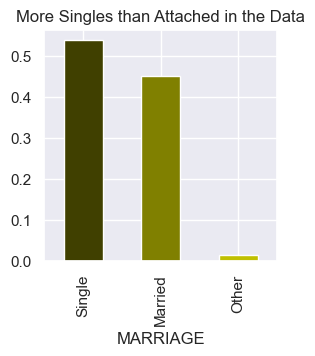

In [32]:
df['MARRIAGE'].value_counts(normalize=True).plot(kind='bar', title='More Singles than Attached in the Data', 
                                                                   color=["#404000","#808000", '#C0C000'], figsize=(3,3))


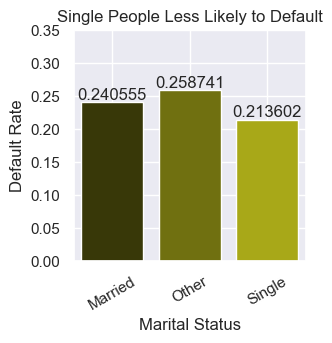

In [33]:
df_mar = df.groupby(['MARRIAGE'])[['default payment next month']].mean() 
df_mar=df_mar.rename(columns = {'default payment next month':'Would Default'})

fig, ax = plt.subplots(figsize=(3,3))

ax = sns.barplot(df_mar.reset_index(), x='MARRIAGE',  y='Would Default', palette=["#404000","#808000", '#C0C000'], 
                 hue=['Married', 'Single', 'Other'], legend=False);
ax.set(ylim=(0, 0.35))
ax.grid(visible=True, axis='y')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.grid(visible=True, axis='both')
ax.set( title='Single People Less Likely to Default')
plt.xlabel('Marital Status')
plt.ylabel("Default Rate");
plt.xticks(rotation = 30);

### Check Education Distribution

<Axes: title={'center': 'More University Graduates in the Data, Fewer with Lower Education Levels'}, xlabel='EDUCATION'>

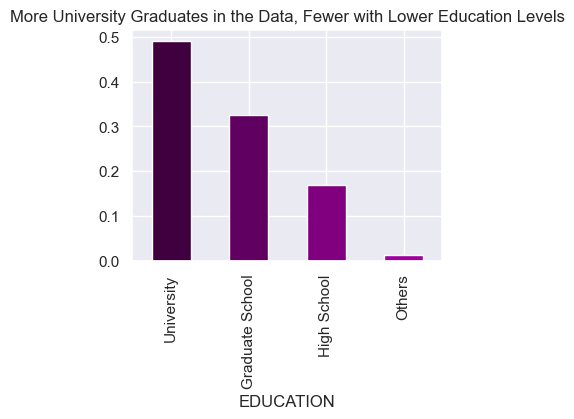

In [34]:
df['EDUCATION'].value_counts(normalize=True).plot(kind='bar', title='More University Graduates in the Data, Fewer with Lower Education Levels', 
                                                                   color=["#400040", "#600060", "#800080", "#A000A0"], figsize=(4,3))


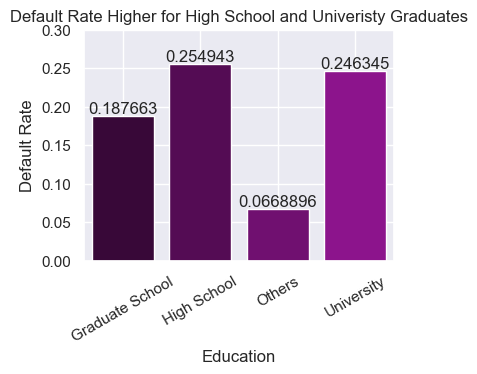

In [35]:
df_edu = df.groupby(['EDUCATION'])[['default payment next month']].mean() 
df_edu=df_edu.rename(columns = {'default payment next month':'Would Default'})

fig, ax = plt.subplots(figsize=(4,3))

ax = sns.barplot(df_edu.reset_index(), x='EDUCATION',  y='Would Default', palette=["#400040", "#600060", "#800080", "#A000A0"],
                hue=['Graduate School', 'High School', 'Others', 'University'], legend=False)
ax.set(ylim=(0, 0.30))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.grid(visible=True, axis='both')
ax.set( title='Default Rate Higher for High School and Univeristy Graduates')
plt.xlabel('Education')
plt.ylabel("Default Rate");
plt.xticks(rotation = 30);

## Change Categorical Data to Appropriate Object Type

In [36]:
df = df.drop('ID', axis=1)

df['SEX'] = df['SEX'].astype('object')
df['EDUCATION'] = df['EDUCATION'].astype('object')
df['MARRIAGE'] = df['MARRIAGE'].astype('object')

## Removing Outliers:

In [37]:
# drop one outlier in the middle of Balance
df[ (df['LIMIT_BAL'] > 320000) & (df['LIMIT_BAL'] < 330000)].head()
df = df[ (df['LIMIT_BAL'] <= 320000) | (df['LIMIT_BAL'] >= 330000)]

# removing outliers for balance
df = df[df['LIMIT_BAL']<610000]

# removing Age outliers: 
df = df[df['AGE']<73]

## Check Dataset Shape and Variance

In [38]:
df.shape

(22306, 24)

In [39]:
df.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,22306.000000,22306.000000,22306.000000,22306.000000,22306.000000,22306.000000,22306.000000,22306.000000,22306.000000,22306.000000,...,22306.000000,22306.000000,22306.000000,22306.000000,2.230600e+04,22306.000000,22306.000000,22306.000000,22306.000000,22306.000000
mean,159776.383036,35.343899,0.107281,0.142159,0.125258,0.093428,0.057787,0.051780,63015.903569,61443.593562,...,55050.859724,51481.034923,49953.252085,6364.243970,6.457243e+03,5748.327939,5266.946203,5345.620954,5594.079530,0.226845
std,127110.236317,9.255672,1.071450,1.103361,1.085951,1.056810,1.015295,1.021254,77270.209804,74933.780662,...,67931.818855,64006.831201,62537.250820,17157.158047,2.078488e+04,16885.238413,14735.366620,14771.604078,17120.836416,0.418801
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,3.000000,7.000000,...,2.000000,2.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11063.250000,11512.000000,...,11443.000000,10280.750000,9700.250000,1500.000000,1.466000e+03,1019.250000,900.000000,976.000000,800.000000,0.000000
50%,130000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36505.000000,35474.000000,...,29295.500000,27954.500000,27187.000000,2916.000000,2.700000e+03,2169.500000,2000.000000,2000.000000,2000.000000,0.000000
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83926.750000,81623.000000,...,73118.250000,68233.000000,66376.750000,5933.750000,5.652750e+03,5000.000000,5000.000000,5000.000000,5000.000000,0.000000
max,600000.000000,72.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,653062.000000,743970.000000,...,706864.000000,823540.000000,699944.000000,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,527143.000000,1.000000


## Check the Scaling

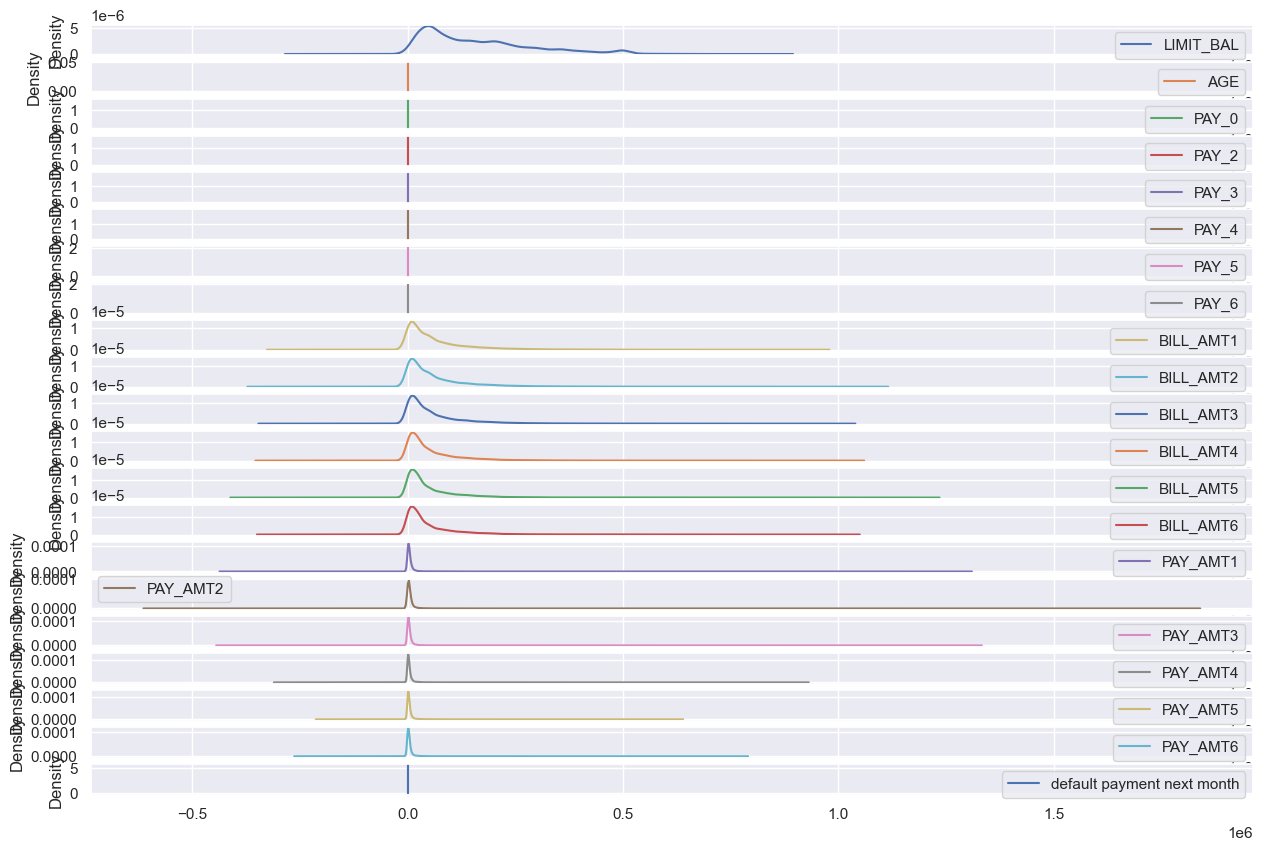

In [40]:
df.plot( kind = 'kde', figsize=(15,10), subplots=True);

In [41]:
df.groupby('default payment next month').describe().T

default payment next month              0              1
LIMIT_BAL count              17246.000000    5060.000000
          mean              172716.687928  115671.936759
          std               129914.651765  105767.290735
          min                10000.000000   10000.000000
          25%                60000.000000   40000.000000
...                                   ...            ...
PAY_AMT6  min                    0.000000       0.000000
          25%                 1000.000000     390.000000
          50%                 2111.000000    1412.000000
          75%                 5000.000000    3197.750000
          max               527143.000000  287982.000000

[160 rows x 2 columns]

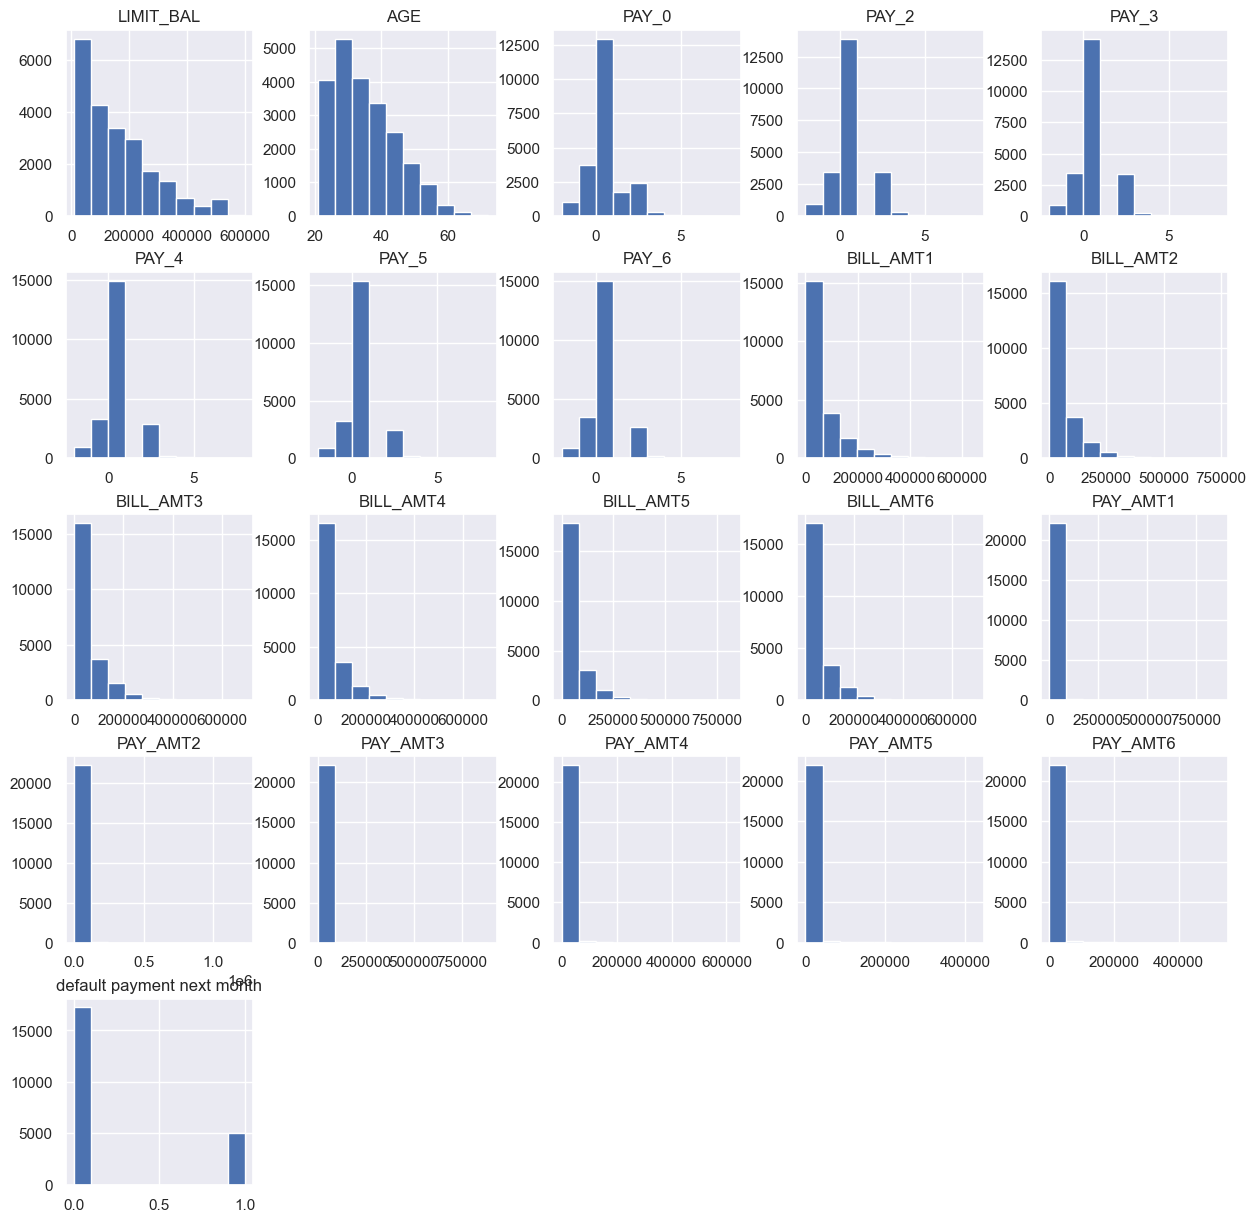

In [42]:
df.hist(figsize=(15,15));

## Check for Correlations

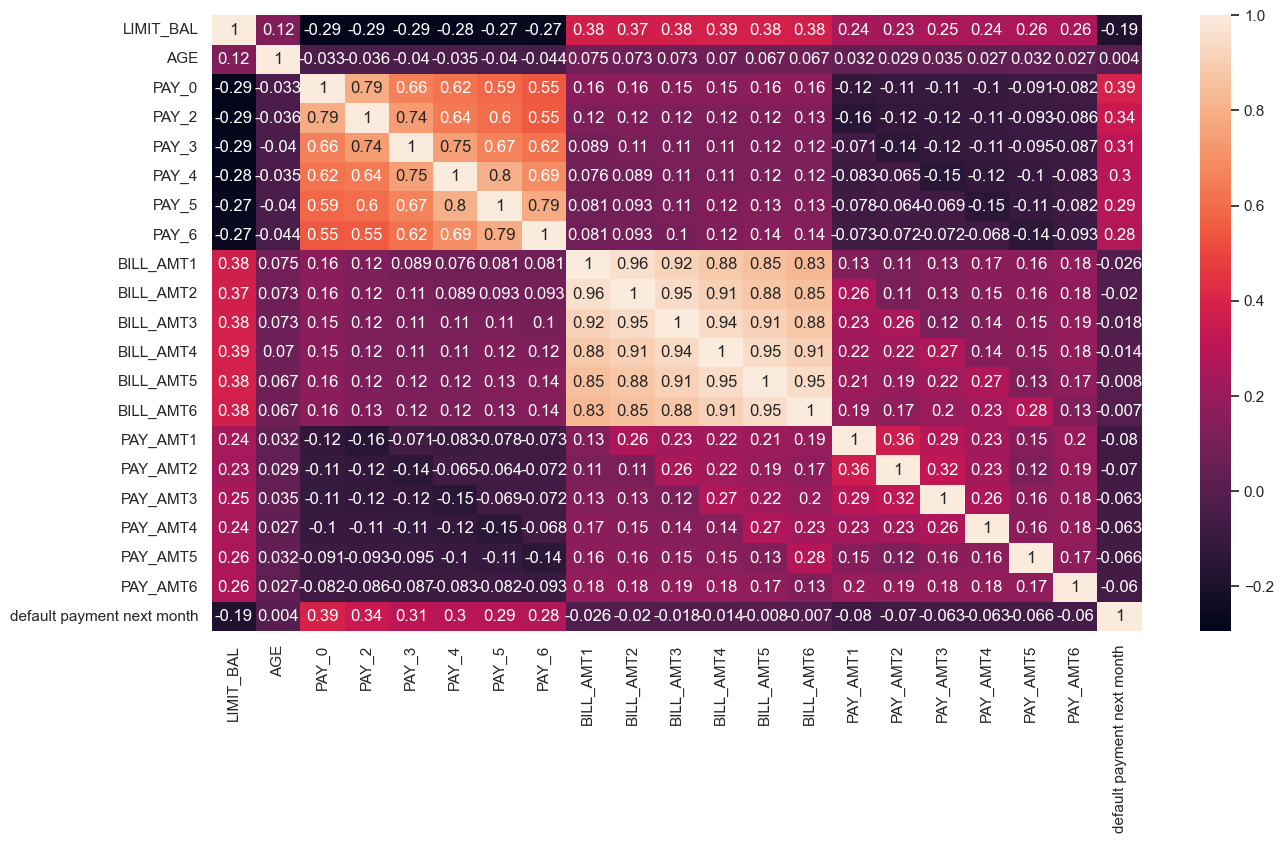

In [43]:
#bi-variate analysis
corr = df.corr(numeric_only = True).round(3)
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot = True);

## Engineering Features

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22306 entries, 1 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   22306 non-null  int64 
 1   SEX                         22306 non-null  object
 2   EDUCATION                   22306 non-null  object
 3   MARRIAGE                    22306 non-null  object
 4   AGE                         22306 non-null  int64 
 5   PAY_0                       22306 non-null  int64 
 6   PAY_2                       22306 non-null  int64 
 7   PAY_3                       22306 non-null  int64 
 8   PAY_4                       22306 non-null  int64 
 9   PAY_5                       22306 non-null  int64 
 10  PAY_6                       22306 non-null  int64 
 11  BILL_AMT1                   22306 non-null  int64 
 12  BILL_AMT2                   22306 non-null  int64 
 13  BILL_AMT3                   22306 non-null  int64 


In [45]:
# sklearn OneHotEncoder, pandas: get_dummies

df2 = pd.get_dummies(df, drop_first=True)

In [46]:
df2.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'SEX_Male', 'EDUCATION_High School', 'EDUCATION_Others',
       'EDUCATION_University', 'MARRIAGE_Other', 'MARRIAGE_Single'],
      dtype='object')

# Train/Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df2.drop(columns = 'default payment next month')
y = df2['default payment next month']

In [49]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

In [50]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('\n')

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

display(X_train.head())
display(y_train.head())


X_train: (15614, 26)
y_train: (15614,)


X_test: (6692, 26)
y_test: (6692,)


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_Male,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Other,MARRIAGE_Single
4387,90000,35,8,7,6,5,4,3,112662,111077,...,0,0,0,0,True,False,False,True,False,False
2732,140000,25,0,0,0,0,0,0,23409,24725,...,1500,2000,2200,2000,False,False,False,False,False,True
16093,290000,35,0,0,0,0,0,0,190453,194303,...,8400,7000,7500,7500,False,False,False,False,False,True
5005,90000,24,-2,-2,-2,-1,0,0,3700,20833,...,13574,14,5,13162,False,True,False,False,True,False
16693,250000,35,2,2,2,2,2,2,153798,164692,...,24000,7000,7000,6700,True,False,False,False,False,True


4387     1
2732     0
16093    0
5005     0
16693    1
Name: default payment next month, dtype: int64

In [51]:
X_train.select_dtypes(['int', 'float']).head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4387,90000,35,8,7,6,5,4,3,112662,111077,108539,106001,103816,101878,0,0,0,0,0,0
2732,140000,25,0,0,0,0,0,0,23409,24725,26006,26771,28179,29746,2000,2000,1500,2000,2200,2000
16093,290000,35,0,0,0,0,0,0,190453,194303,197076,197488,196976,196579,8100,7000,8400,7000,7500,7500
5005,90000,24,-2,-2,-2,-1,0,0,3700,20833,23968,13574,6800,1830,20108,4000,13574,14,5,13162
16693,250000,35,2,2,2,2,2,2,153798,164692,160658,180382,182914,186838,15000,0,24000,7000,7000,6700


## Scaling Columns

In [52]:
to_be_scaled_columns = X.columns

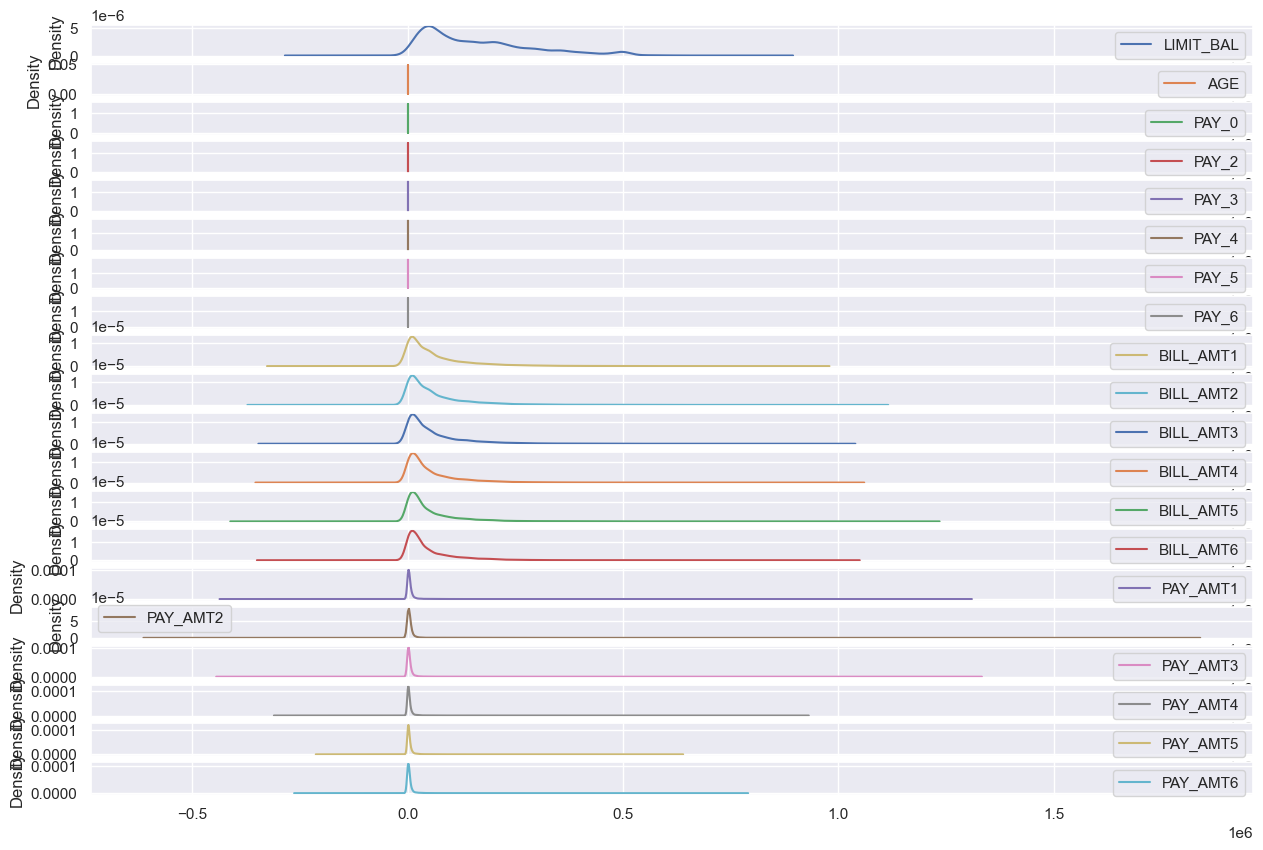

In [53]:
X_train[to_be_scaled_columns].plot(kind = 'kde', subplots = True, figsize=(15,10));

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[to_be_scaled_columns] = scaler.fit_transform(X_train[to_be_scaled_columns])
X_test[to_be_scaled_columns] = scaler.transform(X_test[to_be_scaled_columns])


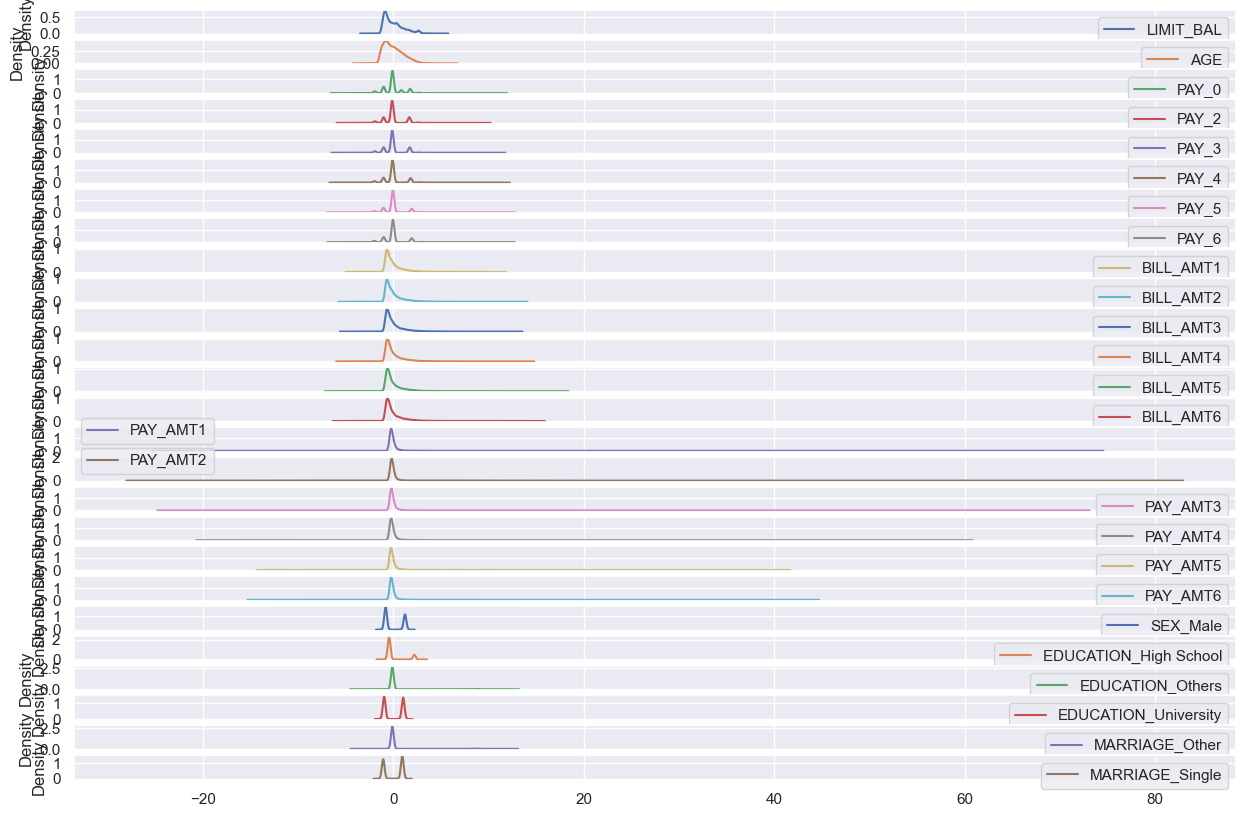

In [55]:
X_train[to_be_scaled_columns].plot(kind = 'kde', subplots = True, figsize=(15,10));

In [56]:
# check to see if scaler worked:
X_train[to_be_scaled_columns].agg(['mean', 'std']).round(1)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_Male,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Other,MARRIAGE_Single
mean,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Create the Result Table

In [57]:
result_df = pd.DataFrame({ 
                          'Train Time (sec)':[], 
                          'Train Accuracy':[], 
                          'Test Accuracy':[],
                          'Test Recall':[],
                          'Test Precision':[]}, index=[])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

def plot_confusion_matrix(model, X, y, title):
    #generate cm:
    cm = confusion_matrix(y, model.predict(X), labels = model.classes_)

    #display
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)

    #show plot
    disp.plot()
    disp.ax_.set_title(title)
    plt.show()

def print_all_scores(name, ttime, y, pred, train_acc):
    acc = accuracy_score(y, pred)
    rec = recall_score(y, pred)
    prec = precision_score(y, pred)
    print ('Accuracy of {}: '.format(name), acc)
    print ('Recall of {}: '.format(name), rec)
    print ('Precision of {}: '.format(name), prec)
    return pd.DataFrame([{'Train Time (sec)':round(ttime, 2), 
                             'Train Accuracy':train_acc, 
                             'Test Accuracy': acc,
                             'Test Recall': rec,
                             'Test Precision': prec,
                            }], index=[name])



In [58]:
import matplotlib as mpl
mpl.rc_file_defaults()

# Dummuy Classifier Performance

In [59]:
from sklearn.dummy import DummyClassifier

In [60]:
dummy = DummyClassifier()

In [61]:
start = time.time()
dummy.fit(X_train, y_train)
end_time = time.time() - start

In [62]:
accuracy_train = dummy.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the model for Train is 0.77


In [63]:
print('The accuracy of the model for Test is {:.2f}'.format(dummy.score(X_test, y_test)))

The accuracy of the model for Test is 0.77


In [64]:
result_df = pd.concat([result_df, 
                       print_all_scores('Dummy Classifier', end_time, y_test, dummy.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Dummy Classifier:  0.7731619844590556
Recall of Dummy Classifier:  0.0
Precision of Dummy Classifier:  0.0


C:\Users\Slytherin\.conda\envs\TensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# A Simple Model

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression(random_state=42)

start = time.time()
lr.fit(X_train, y_train)
end_time = time.time() - start


In [67]:
accuracy_train = lr.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the model for Train is 0.82


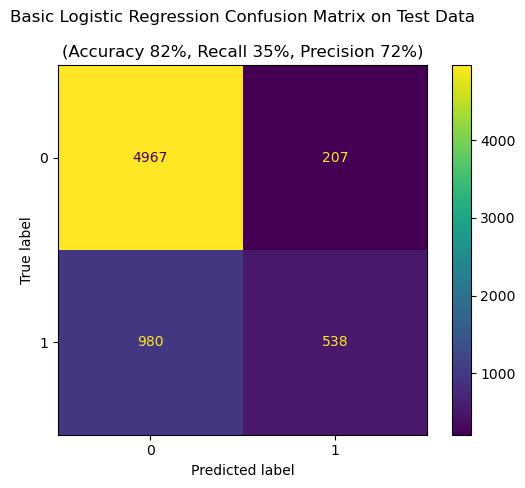

In [68]:
plot_confusion_matrix(lr, X_test, y_test, 
                      'Basic Logistic Regression Confusion Matrix on Test Data\n\n(Accuracy 82%, Recall 35%, Precision 72%)')

In [69]:
result_df = pd.concat([result_df, 
                       print_all_scores('Basic Logistic Regression', end_time, y_test, lr.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Basic Logistic Regression:  0.8226240286909743
Recall of Basic Logistic Regression:  0.3544137022397892
Precision of Basic Logistic Regression:  0.7221476510067114


In [70]:
from sklearn.metrics import classification_report

In [71]:
y_pred = lr.predict(X_test)
target_names = ['no', 'yes']
print(classification_report(y_test, y_pred, target_names= target_names))

              precision    recall  f1-score   support

          no       0.84      0.96      0.89      5174
         yes       0.72      0.35      0.48      1518

    accuracy                           0.82      6692
   macro avg       0.78      0.66      0.68      6692
weighted avg       0.81      0.82      0.80      6692



# EDA Conclusion:

1- Data is highly imbalanced. We need to use appropriate measures like F1 or Recall instead of Accuracy. 

2- Imbalance data needs to be undersampled or oversampled so models like LogisticRegression do not eliminate the small class. SVC needs to have balance parameter.

3- There are correlations between features. PAY_0 has increasing correlation gradually up tp PAY_6, as well as BILL_AMT1 up to BILL_AMT6.

4- Balance distribution is right skewed and has outliers (adjusted to less than $610,000).

5- Age distribution is right-skewed, but the mean is similar for each group (outliers greater than 72 were removed).

6- Gender has an impact on the default. Altough there are more women in the dataset, they have lower default rates than men.

7- Marital status also impacts default rates. Single people are less likely to default than married people.

8- Education also impacts default rates. Post graduate degree holder are less likely to default than High School graduates and basic University degree holders.


# Linear Correlations

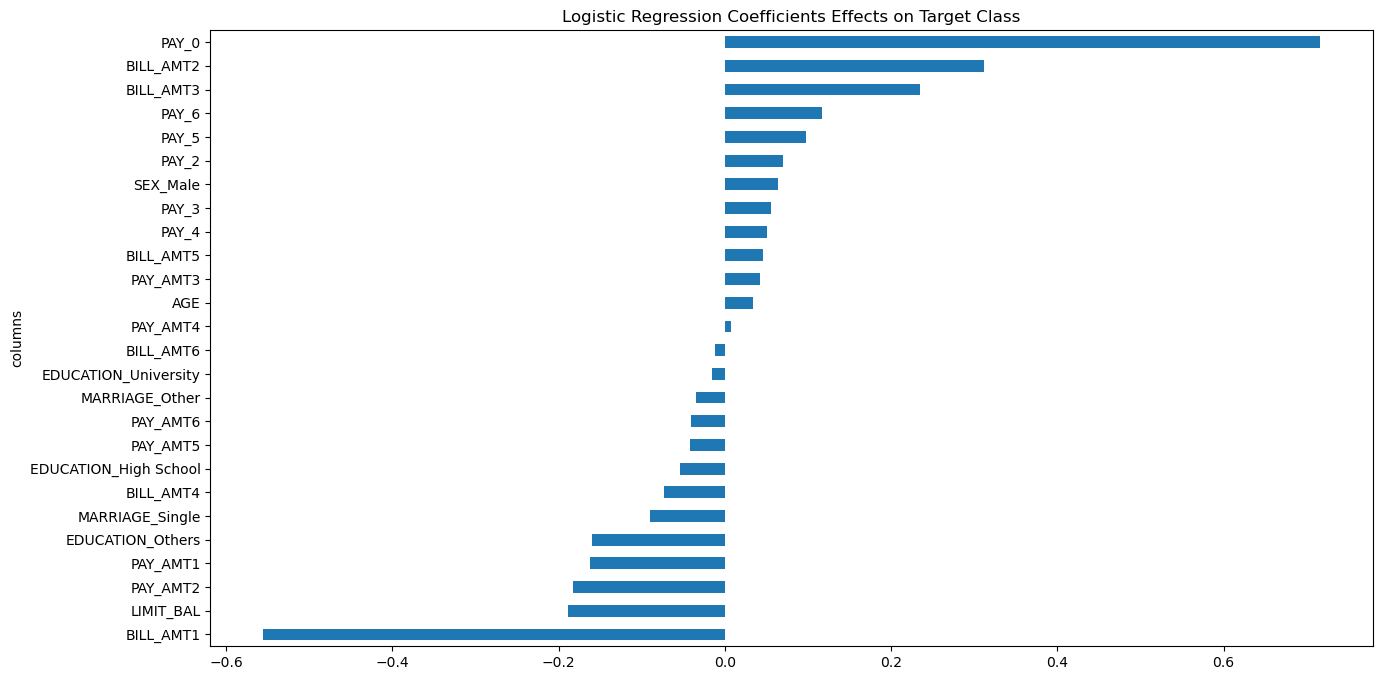

In [72]:
coefs = lr.coef_[0]

# data is already scaled so does not need this transformation:
#coefs = np.exp(lr.coef_[0]) #convert logistic regression Logarithmic coefs to normal values
#for index in range(len(coefs)):
#    if coefs[index]<1.0:
#        coefs[index] = - 1.0 / coefs[index]

labels = X_train.columns.tolist()

lr_results = pd.DataFrame({'columns':labels, 'values':coefs, 'absolute':abs(coefs)}).sort_values(by = 'values')

lr_results.plot(kind = 'barh', x='columns', y='values', legend=False, figsize=(15,8))
plt.title('Logistic Regression Coefficients Effects on Target Class')

plt.show()

In [73]:
lr_results.sort_values(by='absolute', ascending=False) 


,columns,values,absolute
2,PAY_0,0.716001,0.716001
8,BILL_AMT1,-0.555403,0.555403
9,BILL_AMT2,0.311828,0.311828
10,BILL_AMT3,0.234663,0.234663
0,LIMIT_BAL,-0.188742,0.188742
15,PAY_AMT2,-0.182325,0.182325
14,PAY_AMT1,-0.162658,0.162658
22,EDUCATION_Others,-0.159775,0.159775
7,PAY_6,0.116508,0.116508
6,PAY_5,0.097491,0.097491


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [74]:
from sklearn.neighbors import KNeighborsClassifier


In [75]:
knn = KNeighborsClassifier()

start = time.time()
knn.fit(X_train, y_train)
end_time = time.time() - start

In [76]:
accuracy_train = knn.score(X_train, y_train)
print('The accuracy of the KNN model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the KNN model for Train is 0.85


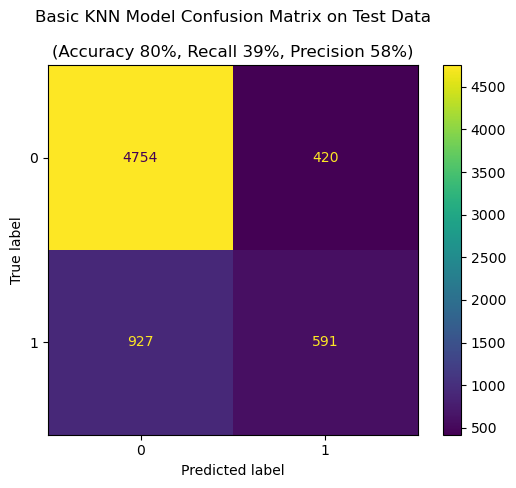

In [77]:
plot_confusion_matrix(knn, X_test, y_test, 
                      'Basic KNN Model Confusion Matrix on Test Data\n\n(Accuracy 80%, Recall 39%, Precision 58%)')

In [78]:
result_df = pd.concat([result_df, 
                       print_all_scores('Basic KNN', end_time, y_test, knn.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Basic KNN:  0.798714883442917
Recall of Basic KNN:  0.3893280632411067
Precision of Basic KNN:  0.5845697329376854


In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt = DecisionTreeClassifier(random_state=42)


start = time.time()
dt.fit(X_train, y_train)
end_time = time.time() - start

In [81]:
accuracy_train = dt.score(X_train, y_train)
print('The accuracy of the DT model for Train is {:.2f}'.format(accuracy_train))


The accuracy of the DT model for Train is 1.00


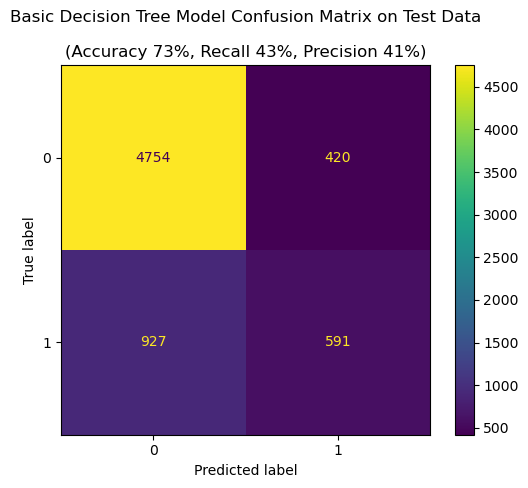

In [82]:
plot_confusion_matrix(knn, X_test, y_test, 
                      'Basic Decision Tree Model Confusion Matrix on Test Data\n\n(Accuracy 73%, Recall 43%, Precision 41%)')

In [83]:
result_df = pd.concat([result_df, 
                       print_all_scores('Basic Decision Tree', end_time, y_test, dt.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Basic Decision Tree:  0.7281829049611477
Recall of Basic Decision Tree:  0.4321475625823452
Precision of Basic Decision Tree:  0.4066955982641042


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier(random_state=42)


start = time.time()
rf.fit(X_train, y_train)
end_time = time.time() - start

In [86]:
accuracy_train = rf.score(X_train, y_train)
print('The accuracy of the RF model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the RF model for Train is 1.00


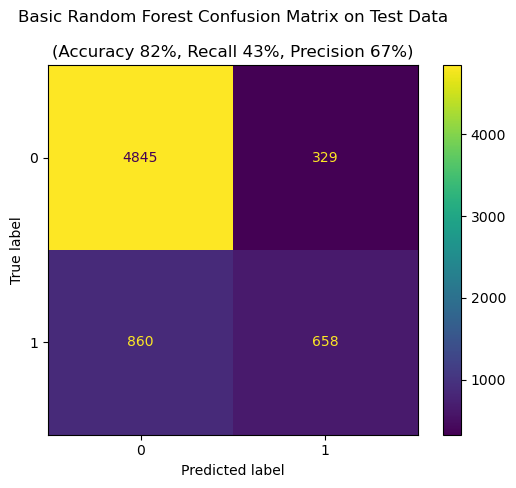

In [87]:
plot_confusion_matrix(rf, X_test, y_test, 
                      'Basic Random Forest Confusion Matrix on Test Data\n\n(Accuracy 82%, Recall 43%, Precision 67%)')

In [88]:
result_df = pd.concat([result_df, 
                       print_all_scores('Basic Random Forest', end_time, y_test, rf.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Basic Random Forest:  0.8223251643753736
Recall of Basic Random Forest:  0.43346508563899866
Precision of Basic Random Forest:  0.6666666666666666


# Non-linear Correlations

C:\Users\Slytherin\AppData\Local\Temp\ipykernel_55048\1336615215.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


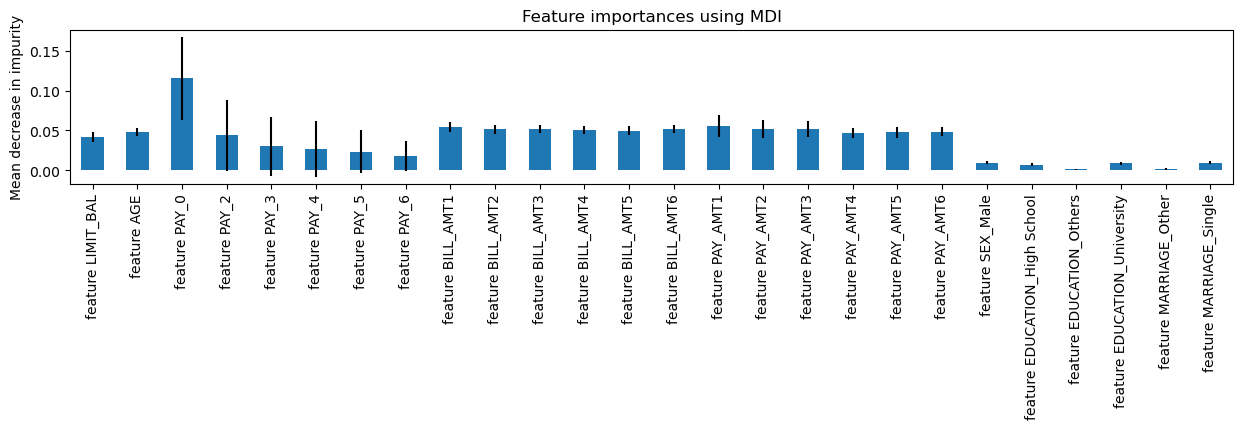

In [89]:
import numpy as np

feature_names = [f"feature {i}" for i in X.columns.tolist()]
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(15,2))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [90]:
from sklearn.svm import SVC

In [91]:
svc = SVC(random_state=42)

start = time.time()
svc.fit(X_train, y_train)
end_time = time.time() - start

In [92]:
accuracy_svc_train = svc.score(X_train, y_train)
print('The accuracy of the SVC model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the SVC model for Train is 1.00


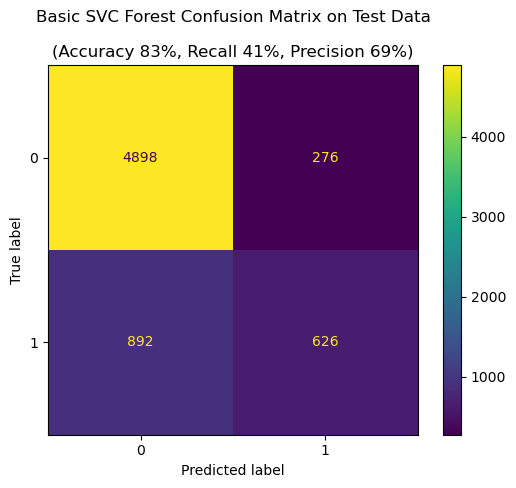

In [93]:
plot_confusion_matrix(svc, X_test, y_test, 
                      'Basic SVC Forest Confusion Matrix on Test Data\n\n(Accuracy 83%, Recall 41%, Precision 69%)')

In [94]:
result_df = pd.concat([result_df, 
                       print_all_scores('Basic SVC', end_time, y_test, svc.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Basic SVC:  0.8254632396891811
Recall of Basic SVC:  0.41238471673254284
Precision of Basic SVC:  0.6940133037694013


In [95]:
#print(result_df.to_string(index=False))
result_df

,Train Time (sec),Train Accuracy,Test Accuracy,Test Recall,Test Precision
Dummy Classifier,0.00,0.773152,0.773162,0.000000,0.000000
Basic Logistic Regression,0.09,0.818560,0.822624,0.354414,0.722148
Basic KNN,0.00,0.849110,0.798715,0.389328,0.584570
Basic Decision Tree,0.27,1.000000,0.728183,0.432148,0.406696
Basic Random Forest,3.40,0.999936,0.822325,0.433465,0.666667
Basic SVC,3.57,0.999936,0.825463,0.412385,0.694013


# Ensemble Techniques:

## Imbalanced Easy Ensemble:

In [96]:
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(random_state=42)
start = time.time()
eec.fit(X_train, y_train)
end_time = time.time() - start

accuracy_train = eec.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

y_pred = eec.predict(X_test)
print(confusion_matrix(y_test, y_pred))

The accuracy of the model for Train is 0.80
[[4409  765]
 [ 596  922]]


In [97]:
result_df = pd.concat([result_df, 
                       print_all_scores('Easy Ensemble Classifier', end_time, y_test, y_pred, accuracy_train)
                      ], ignore_index=False)

Accuracy of Easy Ensemble Classifier:  0.7966228332337119
Recall of Easy Ensemble Classifier:  0.6073781291172595
Precision of Easy Ensemble Classifier:  0.5465323058684054


## Balanced Bagging:

In [98]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Random Forest Classifier (you can use any classifier)
base_classifier = RandomForestClassifier(random_state=42)
# Create a BalancedBaggingClassifier
balanced_bagging_classifier = BalancedBaggingClassifier(base_classifier,
														sampling_strategy='auto', # You can adjust this parameter
														replacement=False, # Whether to sample with or without replacement
														random_state=42)

# Fit the model
start = time.time()
balanced_bagging_classifier.fit(X_train, y_train)
end_time = time.time() - start

accuracy_train = balanced_bagging_classifier.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

# Make predictions
y_pred = balanced_bagging_classifier.predict(X_test)


The accuracy of the model for Train is 0.91


In [99]:
# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7909444112372983
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      5174
           1       0.53      0.62      0.57      1518

    accuracy                           0.79      6692
   macro avg       0.71      0.73      0.72      6692
weighted avg       0.80      0.79      0.80      6692



In [100]:
print(confusion_matrix(y_test, y_pred))

[[4350  824]
 [ 575  943]]


In [101]:
result_df = pd.concat([result_df, 
                       print_all_scores('Balanced Bagging Classifier', end_time, y_test, y_pred, accuracy_train)
                      ], ignore_index=False)

Accuracy of Balanced Bagging Classifier:  0.7909444112372983
Recall of Balanced Bagging Classifier:  0.6212121212121212
Precision of Balanced Bagging Classifier:  0.5336728919071874


## XGBoost

In [102]:
import xgboost as xgb
xg = xgb.XGBClassifier(seed=123)
start = time.time()
xg.fit(X_train, y_train)
end_time = time.time() - start


In [103]:
accuracy_train = xg.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

# Make predictions
y_pred = xg.predict(X_test)

The accuracy of the model for Train is 0.93


In [104]:
print("The accuracy score of the model for test is {:.2f}".format(xg.score(X_test, y_test)))

The accuracy score of the model for test is 0.82


In [105]:
print(confusion_matrix(y_test, y_pred))

[[4812  362]
 [ 872  646]]


In [106]:
result_df = pd.concat([result_df, 
                       print_all_scores('XGBoost', end_time, y_test, y_pred, accuracy_train)
                      ], ignore_index=False)

Accuracy of XGBoost:  0.8156007172743575
Recall of XGBoost:  0.42555994729907776
Precision of XGBoost:  0.6408730158730159


## Nueural Network

In [107]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import backend as K
from tensorflow.keras.layers import Dropout

Num GPUs Available:  0


In [108]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [109]:
print(len(X_train.columns))

tf.random.set_seed(42)

model1 = Sequential()
model1.add(Dense(26, activation = 'relu'))
model1.add(Dense(130, activation = 'relu'))
model1.add(Dense(130, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(loss = 'bce', metrics = ['acc'])
start = time.time()
history1 = model1.fit(X_train, y_train, validation_data = (X_test, y_test),
                     epochs = 20, verbose = 1)
end_time = time.time() - start

26
Epoch 1/20
488/488 [==============================] - 2s 4ms/step - loss: 0.4570 - acc: 0.8117 - val_loss: 0.4416 - val_acc: 0.8217
Epoch 2/20
488/488 [==============================] - 2s 4ms/step - loss: 0.4317 - acc: 0.8229 - val_loss: 0.4375 - val_acc: 0.8240
Epoch 3/20
488/488 [==============================] - 2s 4ms/step - loss: 0.4237 - acc: 0.8268 - val_loss: 0.4346 - val_acc: 0.8217
Epoch 4/20
488/488 [==============================] - 2s 4ms/step - loss: 0.4191 - acc: 0.8282 - val_loss: 0.4335 - val_acc: 0.8234
Epoch 5/20
488/488 [==============================] - 3s 6ms/step - loss: 0.4157 - acc: 0.8293 - val_loss: 0.4323 - val_acc: 0.8234
Epoch 6/20
488/488 [==============================] - 3s 6ms/step - loss: 0.4128 - acc: 0.8292 - val_loss: 0.4336 - val_acc: 0.8186
Epoch 7/20
488/488 [==============================] - 2s 4ms/step - loss: 0.4124 - acc: 0.8286 - val_loss: 0.4578 - val_acc: 0.8199
Epoch 8/20
488/488 [==============================] - 2s 3ms/step - loss:

In [110]:
y_pred = tf.greater(model1.predict(X_test), 0.50)

210/210 [==============================] - 1s 3ms/step


In [111]:
print(confusion_matrix(y_test, y_pred))

[[4886  288]
 [ 941  577]]


In [112]:
result_df = pd.concat([result_df, 
                       print_all_scores('Neural Network', end_time, y_test, y_pred, accuracy_train)
                      ], ignore_index=False)

Accuracy of Neural Network:  0.8163478780633593
Recall of Neural Network:  0.3801054018445323
Precision of Neural Network:  0.6670520231213873


In [113]:
result_df

,Train Time (sec),Train Accuracy,Test Accuracy,Test Recall,Test Precision
Dummy Classifier,0.00,0.773152,0.773162,0.000000,0.000000
Basic Logistic Regression,0.09,0.818560,0.822624,0.354414,0.722148
Basic KNN,0.00,0.849110,0.798715,0.389328,0.584570
Basic Decision Tree,0.27,1.000000,0.728183,0.432148,0.406696
Basic Random Forest,3.40,0.999936,0.822325,0.433465,0.666667
Basic SVC,3.57,0.999936,0.825463,0.412385,0.694013
Easy Ensemble Classifier,4.10,0.798322,0.796623,0.607378,0.546532
Balanced Bagging Classifier,11.47,0.909632,0.790944,0.621212,0.533673
XGBoost,0.18,0.927437,0.815601,0.425560,0.640873
Neural Network,39.07,0.927437,0.816348,0.380105,0.667052


# Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Hyperparameter Tuning for XGBoost

In [114]:
scale_pos = df2['default payment next month'].sum()
scale_pos = (df2['default payment next month'].count() - scale_pos) / scale_pos
scale_pos

3.408300395256917

In [115]:
bst = xgb.XGBClassifier(seed=123, n_estimators=3, max_depth=2, learning_rate=1.0, objective='binary:logitraw', scale_pos_weight=scale_pos)
start = time.time()
bst.fit(X_train, y_train)
end_time = time.time() - start

In [116]:
accuracy_train = bst.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

# Make predictions
y_pred = bst.predict(X_test)

The accuracy of the model for Train is 0.81


In [117]:
print("The accuracy score of the model for test is {:.2f}".format(bst.score(X_test, y_test)))

The accuracy score of the model for test is 0.81


In [118]:
print(confusion_matrix(y_test, y_pred))

[[4549  625]
 [ 647  871]]


In [119]:
result_df = pd.concat([result_df, 
                       print_all_scores('Improved XGBoost', end_time, y_test, y_pred, accuracy_train)
                      ], ignore_index=False)

Accuracy of Improved XGBoost:  0.8099222952779438
Recall of Improved XGBoost:  0.5737812911725956
Precision of Improved XGBoost:  0.5822192513368984


## Hyperparameter Tuning for XGBoost Model

In [120]:
from sklearn.model_selection import GridSearchCV
#svc = SVC(kernel="poly", degree=1, class_weight='balanced', random_state=42)
bst = xgb.XGBClassifier(seed=123, n_estimators=3, max_depth=2, learning_rate=1.0, objective='binary:logitraw', scale_pos_weight=scale_pos)


param_dict = {'n_estimators':[1,2,3,4,5], 'max_depth':[1,2,3,4,5], 'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 1.0, 2.0]}
    
mygrid = GridSearchCV(estimator = bst, param_grid=param_dict, scoring = 'f1')
start = time.time()
mygrid.fit(X_train,y_train)
end_time = time.time() - start

accuracy_train = mygrid.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the model for Train is 0.59


In [121]:
best_selector = mygrid.best_estimator_
best_selector

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4, n_jobs=None,
              num_parallel_tree=None, objective='binary:logitraw', ...)

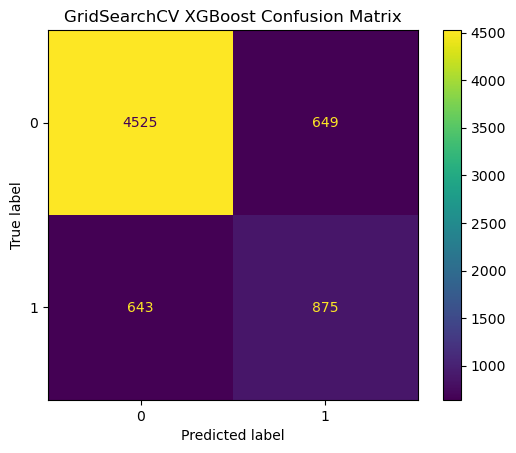

In [122]:
plot_confusion_matrix(best_selector, X_test, y_test, 'GridSearchCV XGBoost Confusion Matrix')

In [123]:
result_df = pd.concat([result_df, 
                       print_all_scores('GridSearchCV on XGBoost', end_time, y_test, best_selector.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of GridSearchCV on XGBoost:  0.8069336521219367
Recall of GridSearchCV on XGBoost:  0.5764163372859025
Precision of GridSearchCV on XGBoost:  0.5741469816272966


## Removing Unimportant Features

In [124]:
df2.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'SEX_Male', 'EDUCATION_High School', 'EDUCATION_Others',
       'EDUCATION_University', 'MARRIAGE_Other', 'MARRIAGE_Single'],
      dtype='object')

In [125]:
#df3 = pd.get_dummies(df2.drop(['PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_University', 
#                               'EDUCATION_Others', 'MARRIAGE_Other'], axis=1), drop_first=True)
df3 = pd.get_dummies(df2.drop(['EDUCATION_Others', 'EDUCATION_University'], axis=1), drop_first=True)

In [126]:
X = df3.drop(columns = 'default payment next month')
y = df3['default payment next month']

In [127]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [128]:
to_be_scaled_columns = X.columns; #['LIMIT_BAL', 'PAY_0','AGE', 'BILL_AMT1','BILL_AMT2','PAY_AMT1','BILL_AMT2','EDUCATION_4']

In [129]:
X_train[to_be_scaled_columns] = scaler.fit_transform(X_train[to_be_scaled_columns])
X_test[to_be_scaled_columns] = scaler.transform(X_test[to_be_scaled_columns])

In [130]:
dummy.fit(X_train, y_train)

print('The accuracy of the model for Train is {:.2f}'.format(dummy.score(X_train, y_train)))
print('The accuracy of the model for Test is {:.2f}'.format(dummy.score(X_test, y_test)))

The accuracy of the model for Train is 0.77
The accuracy of the model for Test is 0.78


In [131]:
lr = LogisticRegression(class_weight='balanced', penalty='l2', fit_intercept=False, random_state=42)
start = time.time()
lr.fit(X_train, y_train)
end_time = time.time() - start

accuracy_train = lr.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the model for Train is 0.67


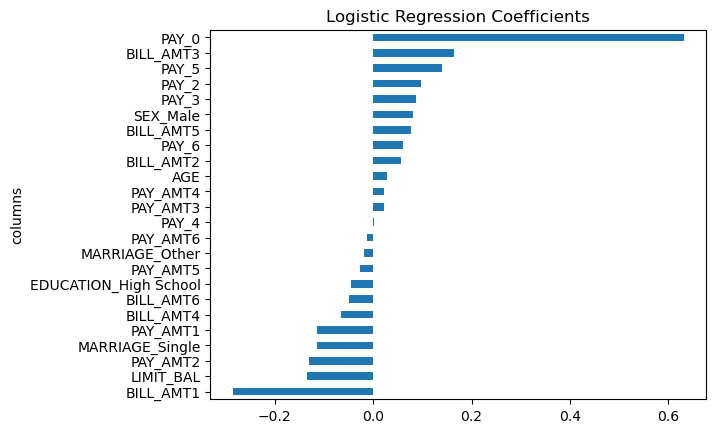

In [132]:
coefs = lr.coef_[0]

labels = X_train.columns.tolist()

lr_results = pd.DataFrame({'columns':labels, 'values':coefs}).sort_values(by = 'values')

lr_results.plot(kind = 'barh', x='columns', y='values', legend=False)
plt.title('Logistic Regression Coefficients')

plt.show()

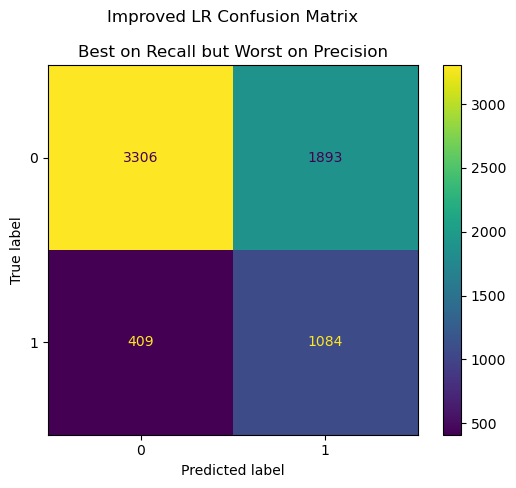

In [133]:
plot_confusion_matrix(lr, X_test, y_test, 'Improved LR Confusion Matrix\n\nBest on Recall but Worst on Precision')

In [134]:
result_df = pd.concat([result_df, 
                       print_all_scores('Improved Logistic Regression', end_time, y_test, lr.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Improved Logistic Regression:  0.6560071727435745
Recall of Improved Logistic Regression:  0.7260549229738781
Precision of Improved Logistic Regression:  0.3641249580114209


In [135]:
svc = SVC(class_weight='balanced', random_state=42) #kernel='rbf', class_weight='balanced', class_weight={0: 0.3, 1: 1.0}
start = time.time()
svc.fit(X_train, y_train)
end_time = time.time() - start

accuracy_train = svc.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the model for Train is 0.81


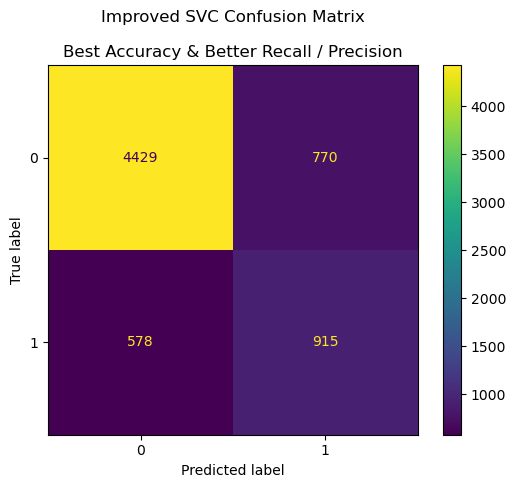

In [136]:
plot_confusion_matrix(svc, X_test, y_test, "Improved SVC Confusion Matrix\n\nBest Accuracy & Better Recall / Precision")

In [137]:
result_df = pd.concat([result_df, 
                       print_all_scores('Improved SVC', end_time, y_test, svc.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Improved SVC:  0.7985654512851166
Recall of Improved SVC:  0.6128600133958473
Precision of Improved SVC:  0.543026706231454


In [138]:
result_df

,Train Time (sec),Train Accuracy,Test Accuracy,Test Recall,Test Precision
Dummy Classifier,0.00,0.773152,0.773162,0.000000,0.000000
Basic Logistic Regression,0.09,0.818560,0.822624,0.354414,0.722148
Basic KNN,0.00,0.849110,0.798715,0.389328,0.584570
Basic Decision Tree,0.27,1.000000,0.728183,0.432148,0.406696
Basic Random Forest,3.40,0.999936,0.822325,0.433465,0.666667
Basic SVC,3.57,0.999936,0.825463,0.412385,0.694013
Easy Ensemble Classifier,4.10,0.798322,0.796623,0.607378,0.546532
Balanced Bagging Classifier,11.47,0.909632,0.790944,0.621212,0.533673
XGBoost,0.18,0.927437,0.815601,0.425560,0.640873
Neural Network,39.07,0.927437,0.816348,0.380105,0.667052


## ROC Curve and Probability on Logistic Regression Model:
While this method results in best False Positive rate, it sacrifices the accuracy and we have to go through half of the population. This can be costly from the business stand point, but a more detailed cost analysis is needed to find the best balance.

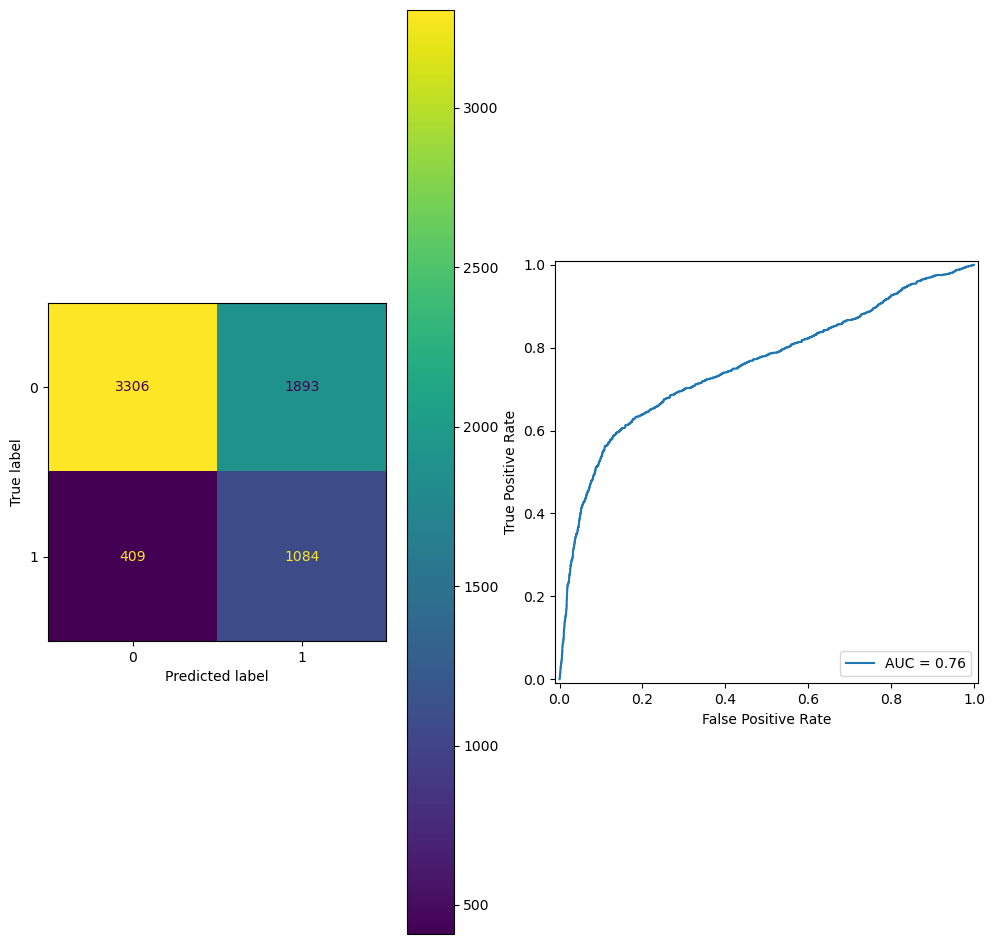

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import auc as skl_auc

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

preds = lr.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, preds)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])


y_score = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(roc_auc_value, 2)



In [140]:
no_probs = lr.predict_proba(X_test)[:, 0]
high_prob_no = no_probs[no_probs > 0.58]
percent_of_test_data = len(high_prob_no)/len(y_test)
percent_of_no = len(high_prob_no)/sum(y_test == 0)

print(percent_of_test_data)
print(percent_of_no)

0.33069336521219367
0.42565878053471823


In [141]:
from sklearn.metrics import accuracy_score

prob_threshold = 0.58
start = time.time()
pred_proba_df = pd.DataFrame(lr.predict_proba(X_test))
y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>prob_threshold else 0)

pred_proba_df_tr = pd.DataFrame(lr.predict_proba(X_train))
y_train_pred = pred_proba_df_tr.applymap(lambda x: 1 if x>prob_threshold else 0)

accuracy_train = accuracy_score(y_train.values.reshape(y_train.values.size,1),
                                       y_train_pred.iloc[:,1].values.reshape(y_train_pred.iloc[:,1].values.size,1))

test_accuracy = accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                       y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))

end_time = time.time() - start

print('Our testing accuracy is {}'.format(test_accuracy))

print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                       y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))


Our testing accuracy is 0.7993126120741183
[[4459  740]
 [ 603  890]]


C:\Users\Slytherin\AppData\Local\Temp\ipykernel_55048\3335664607.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>prob_threshold else 0)
C:\Users\Slytherin\AppData\Local\Temp\ipykernel_55048\3335664607.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_train_pred = pred_proba_df_tr.applymap(lambda x: 1 if x>prob_threshold else 0)


In [142]:
result_df = pd.concat([result_df, 
                       print_all_scores('ROC on Logistic Regression', end_time, y_test.values.reshape(y_test.values.size,1), y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1), accuracy_train)
                      ], ignore_index=False)

Accuracy of ROC on Logistic Regression:  0.7993126120741183
Recall of ROC on Logistic Regression:  0.5961152042866711
Precision of ROC on Logistic Regression:  0.5460122699386503


##### Questions

The question here remains for the Subject-Matter-Experts (SME) and business analysts: how many of the potential customers are we willing to sacrifice to release more marketing resources?

With our final SVM models, we have a ***False Positive*** rate of %17.7 and ***False Negative*** rate of only 0.5%. So we are using almost 20% more resources for marketing campaigns than ideal numbers. Although this can be costly from a business standpoint, a detailed cost-basis analysis is needed to see if it is worth sacrificing more resources or change the model parameters to allow lower ***Recall*** score.

# All Results

In [143]:
result_df

,Train Time (sec),Train Accuracy,Test Accuracy,Test Recall,Test Precision
Dummy Classifier,0.00,0.773152,0.773162,0.000000,0.000000
Basic Logistic Regression,0.09,0.818560,0.822624,0.354414,0.722148
Basic KNN,0.00,0.849110,0.798715,0.389328,0.584570
Basic Decision Tree,0.27,1.000000,0.728183,0.432148,0.406696
Basic Random Forest,3.40,0.999936,0.822325,0.433465,0.666667
Basic SVC,3.57,0.999936,0.825463,0.412385,0.694013
Easy Ensemble Classifier,4.10,0.798322,0.796623,0.607378,0.546532
Balanced Bagging Classifier,11.47,0.909632,0.790944,0.621212,0.533673
XGBoost,0.18,0.927437,0.815601,0.425560,0.640873
Neural Network,39.07,0.927437,0.816348,0.380105,0.667052
